In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

from utils import * # Contains the mapping functions

In [3]:
import qiskit
import qiskit_aer
from qiskit.quantum_info import hellinger_fidelity
from qiskit_ibm_runtime import QiskitRuntimeService

import os
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# import mapomatic

## Settings for noise model

In [5]:
# from qiskit.providers.fake_provider import *
from qiskit_ibm_runtime.fake_provider import *
from qiskit.visualization import plot_error_map
# from qiskit_ibm_provider import IBMProvider
from datetime import datetime

fake_backend = FakeBrisbane()
fake_coupling_map = fake_backend.configuration().coupling_map

## Generate circuit

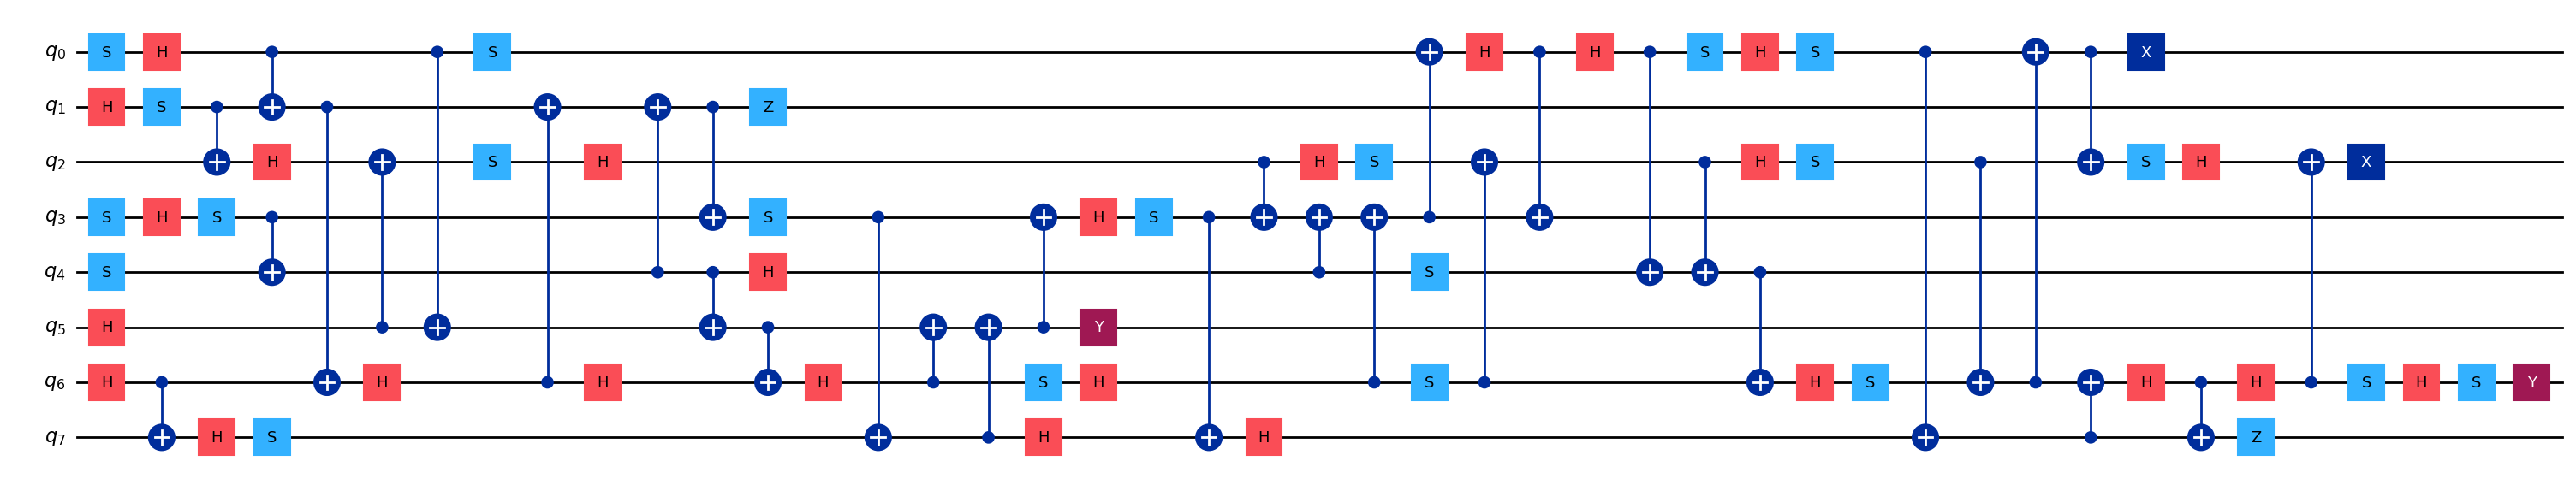

In [12]:
from qiskit.quantum_info import random_clifford

num_qubits = 8
clifford_obj = random_clifford(num_qubits)
circ = clifford_obj.to_circuit()
circ.draw("mpl", fold=-1)

## Get mappings using VF2 algorithm (same algorithm that mapomatic uses)

In [17]:
VF2_mapping_ranges, small_qc = get_VF2_layouts(circ, fake_backend)
print(len(VF2_mapping_ranges))
print(VF2_mapping_ranges)

3
[[3, 4, 5, 15, 20, 21, 22, 23], [35, 28, 29, 27, 8, 16, 26, 25], [73, 85, 84, 86, 106, 93, 87, 88]]


## Get mappings by partitioning the chip into connected regions (doesn't use cirucit as input)

In [20]:
mapping_ranges = generate_mapping_ranges_dfs(num_qubits, fake_backend.configuration().num_qubits, fake_coupling_map)
print(len(mapping_ranges))
print(mapping_ranges)

14
[[0, 14, 18, 19, 20, 21, 22, 23], [1, 2, 3, 4, 15, 5, 6, 7], [8, 16, 26, 27, 28, 35, 47, 48], [9, 10, 11, 12, 13, 17, 30, 31], [24, 25, 34, 43, 44, 45, 54, 64], [32, 36, 51, 50, 49, 55, 68, 69], [33, 39, 40, 41, 42, 53, 60, 61], [37, 52, 56, 57, 58, 71, 77, 78], [62, 72, 81, 82, 83, 84, 85, 86], [70, 74, 89, 88, 87, 93, 106, 107], [75, 76, 90, 94, 95, 96, 109, 114], [79, 91, 98, 99, 100, 101, 102, 103], [104, 111, 122, 123, 124, 125, 126, 112], [110, 118, 119, 120, 121, 117, 116, 115]]


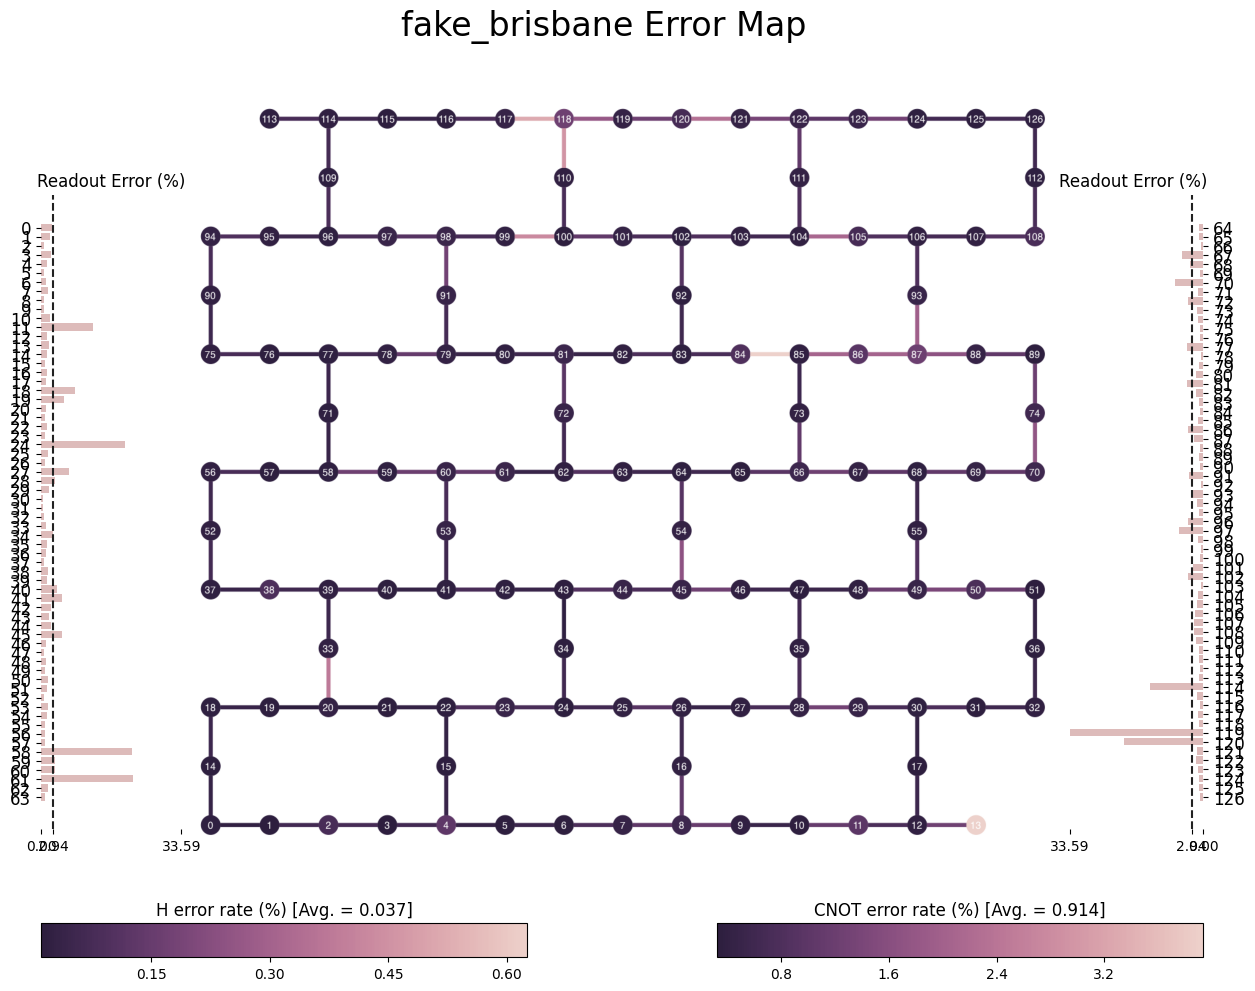

In [22]:
from qiskit.visualization import plot_error_map

plot_error_map(fake_backend)